# BridgeCrossingBruteForce

# Tim Meek II

The purpose of this program is to show all the possible solutions of how N people can cross a bridge in pairs with one of them returning back to the original side until all people have successfully crossed. This solution will use a brute force method of solving and will organize all possible combinations based on how long it took the group to successfully cross the bridge. In addition to the list of possible solutions, a histogram was added to help visualize the distribution of times for all the possible solutions.

The brute force program consists of 3 functions: findSolutions, crossBridge, and returnTorch.  findSolutions breaks the sideA list into all the possible combinations of pairs that can cross the bridge together and stores them into the "pairs" list.  Each of the pairs within the "pairs" list is then sent to the crossBridge function.  This function will remove the two people in the pair that is crossing the bridge from the sideA list and append them to the sideB list.  This move will be converted to a string and saved to the "solution" string.  The time of the slowest person within the pair will then be added to the "runningTime" variable.  For every person on sideB, the returnTorch function will then be called.  This function is used to return the person back from sideB to sideA.  This is done by removing the person from the sideB list and appending them to the sideA list.  The movement is then again added to the "solution" string and the time is added to the "runningTime" variable.  After this, the new lists of sideA and sideB are then used within the findSolutions function creating a recursive loop of the functions until all individuals have successfully crossed to sideB.  The stored solutions are then sorted and displayed for the user to see.

Solution 1 =  [ C+D,  C,  A+B,  D,  C+D ]
     Time:  17 min
*****************************************
Solution 2 =  [ C+D,  D,  A+B,  C,  D+C ]
     Time:  17 min
*****************************************
Solution 3 =  [ A+D,  D,  B+D,  D,  C+D ]
     Time:  19 min
*****************************************
Solution 4 =  [ A+D,  D,  C+D,  D,  B+D ]
     Time:  19 min
*****************************************
Solution 5 =  [ B+D,  D,  A+D,  D,  C+D ]
     Time:  19 min
*****************************************
Solution 6 =  [ B+D,  D,  C+D,  D,  A+D ]
     Time:  19 min
*****************************************
Solution 7 =  [ C+D,  D,  A+D,  D,  B+D ]
     Time:  19 min
*****************************************
Solution 8 =  [ C+D,  D,  B+D,  D,  A+D ]
     Time:  19 min
*****************************************
Solution 9 =  [ A+C,  C,  B+D,  D,  C+D ]
     Time:  20 min
*****************************************
Solution 10 =  [ A+C,  C,  D+C,  D,  B+D ]
     Time:  20 min
***********

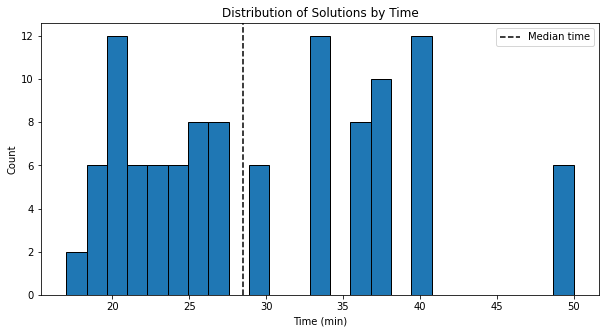

In [52]:
"""
Tim Meek II
Created: 5/11/21
Last Updated: 5/13/21
"""

import itertools    # use the combinations function from itertools
import matplotlib.pyplot as plt   # use to graph output data
import numpy as np

sideA = []          # list
crossingTimes = {}  # dictionary
sideB = []          # list
startingTime = 0    # int
solutions = []      # list

def findSolutions(sideA, sideB, solution, solutions, runningTime):
    if len(sideA) > 0:
        pairs = [] # will store all possible pairs that can cross together
        comb = itertools.combinations(sideA, 2) # iterator for the determined solutions

        # append all possible combinations of pairs to iterator
        for a, b in comb:
            pairs.append((a, b)) 

        # send each pair to crossBridge method
        for pair in pairs:
            crossBridge(sideA[:], sideB[:], pair, solution, solutions, runningTime)


# Move pair from sideA to sideB
def crossBridge(sideA, sideB, pair, solution, solutions, runningTime): 
    if len(sideA) > 0:
        sideA.remove(pair[0])     # remove from sideA
        sideA.remove(pair[1])
        sideB.append(pair[0])     # append to sideB
        sideB.append(pair[1])
        solution += str(pair[0]) + '+' + str(pair[1])   # add move to the solution list
        runningTime += max(crossingTimes[pair[0]], crossingTimes[pair[1]]) # add the time of the slowest person

        # Once all individuals have crossed all solutions and the total time are then stored in solutions list
        if len(sideA) == 0:
            solutions.append((solution, runningTime))
        for person in sideB:
            returnTorch(sideA[:], sideB[:], person, solution, solutions, runningTime)       
        

# Returns the torch back from sideB to sideA
def returnTorch(sideA, sideB, person, solution, solutions, runningTime):
    sideB.remove(person)
    sideA.append(person)
    solution += ',  ' + str(person) + ',  ' # add this move to the solution
    runningTime += crossingTimes[person]    # add persons crossing time to the running time
    findSolutions(sideA[:], sideB[:], solution, solutions, runningTime)     # repeat findSolutions with data


# !!! Data processed by the brute force algorithm goes here !!! #
sideA = ['A', 'B', 'C', 'D']  # Name of people need to cross bridge
crossingTimes = {'A':10, 'B':5, 'C':2, 'D':1} # How long each person takes to cross
sideB = [] # Original set of those who have already crossed, if any
startingTime = 0
solutions = []  # will store all possible solutions

# Call findSolutions function
findSolutions(sideA, sideB, '', solutions, startingTime)

# sort solutions from fastest to slowest using lambda function
sortedSolutions = sorted(solutions, key=lambda x: x[1])

# format output
solutionCount = 0
listOfTimes = []
outputSolution = ''
for solutions in sortedSolutions:
    solutionCount +=1
    outputSolution = 'Solution '+ str(solutionCount) +' =  [ '+ str(solutions[0]) +' ]'  # solutions[0] stores the string of how the individuals crossed
    print(outputSolution)
    print('     Time: ', solutions[1], 'min') # solutions[1] stores the int of how many minutes it took for that solution
    print('*'*(len(outputSolution)))
    listOfTimes.append(solutions[1])   # append data for histagram
    
# visualize output times as histogram
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(listOfTimes, bins=25, edgecolor="black");
plt.title("Distribution of Solutions by Time")
plt.xlabel("Time (min)")
plt.ylabel("Count")

# display median line
median_time = np.median(listOfTimes)
ax.axvline(median_time, color="black", ls="--", label="Median time")
ax.legend();

This shows that there are 108 possible solutions, when there are 4 people on the starting side of the bridge. Every possible solution to the puzzle is displayed along with how long that solution would take in minutes.
In order to determine the number of possible solutions based on the number of people trying to cross, the following equation can be used:
$$
  {P_{S} = } \frac{N!^3}{2^{N-1}*N^2}\
$$
Where P is the number of possible solutions and N is the number of people trying to cross.

In addition to solving the problem with this brute force method, the minimum time can be calculated by using "The Optimal Solution" provided in the Gunter Rote paper.

In [57]:
def fastestCrossing(times):
    times.sort()       # sort provided numbers from least to greatest
    if len(times)>3:   # use recursion to loop until the length there are less than 3 people remaining on the beginning side of the bridge
        runningTime = times[0]+times[-1]+min(2*times[1],times[0]+times[-2])  # "The Optimal Solution" equation from Gunter Rote paper
        return  runningTime + fastestCrossing(times[:-2])    # recursion on remaining people needing to cross
    else:
        return sum(times[len(times)==2:])          # add the remaining time when then are only two people left to cross

# output the time of the most optimum order from the given times
print('Minimum time for everybody to cross is' , fastestCrossing([10, 5, 2, 1]), 'minutes.')

Minimum time for everybody to cross is 17 minutes.
